In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.preprocessing import MaxAbsScaler

from matplotlib import pyplot as plt


In [28]:

iris = load_iris()

In [29]:
target_names = iris.target_names

In [30]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.isnull().values.any()

np.False_

<Axes: >

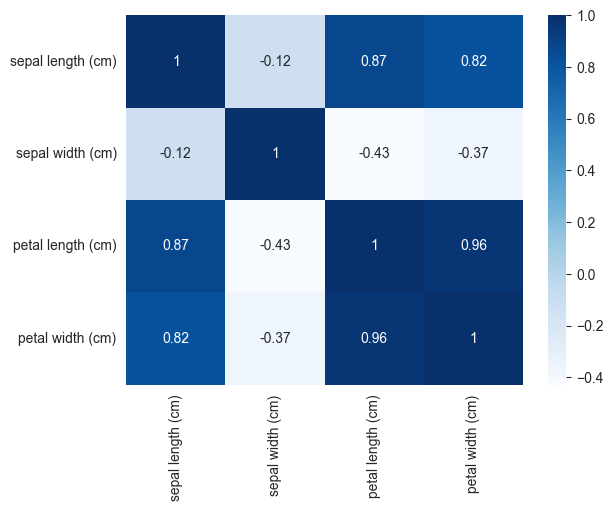

In [35]:
sb.heatmap(df.corr(), cmap="Blues", annot=True)

In [36]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [37]:
iris_data = iris.data[:, :2]

In [38]:
iris_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
len(iris.data)

150

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris.target, test_size = 0.5, random_state = 0)

In [42]:
#Scale each feature by its maximum absolute value.
data_transformer = MaxAbsScaler().fit(X_train)
X_train = data_transformer.transform(X_train)

In [43]:
X_train

array([[0.58227848, 0.75609756],
       [0.74683544, 0.73170732],
       [0.64556962, 0.6097561 ],
       [0.58227848, 0.82926829],
       [0.78481013, 0.53658537],
       [0.91139241, 0.87804878],
       [0.72151899, 0.70731707],
       [0.60759494, 0.73170732],
       [0.89873418, 0.73170732],
       [0.87341772, 0.7804878 ],
       [0.82278481, 0.73170732],
       [0.81012658, 0.68292683],
       [0.64556962, 0.92682927],
       [0.60759494, 0.82926829],
       [0.82278481, 0.7804878 ],
       [0.84810127, 0.80487805],
       [0.56962025, 0.56097561],
       [0.78481013, 0.82926829],
       [0.62025316, 0.73170732],
       [0.72151899, 0.6097561 ],
       [0.87341772, 0.75609756],
       [0.55696203, 0.7804878 ],
       [0.63291139, 0.87804878],
       [0.91139241, 0.73170732],
       [0.64556962, 0.85365854],
       [0.55696203, 0.73170732],
       [0.6835443 , 0.95121951],
       [0.69620253, 0.56097561],
       [0.86075949, 0.7804878 ],
       [0.96202532, 0.73170732],
       [0.

In [44]:
X_test=data_transformer.transform(X_test)
X_test

array([[0.73417722, 0.68292683],
       [0.75949367, 0.53658537],
       [0.69620253, 1.02439024],
       [0.92405063, 0.70731707],
       [0.63291139, 0.82926829],
       [0.79746835, 0.80487805],
       [0.63291139, 0.85365854],
       [0.84810127, 0.75609756],
       [0.86075949, 0.68292683],
       [0.7721519 , 0.68292683],
       [0.7721519 , 0.63414634],
       [0.81012658, 0.7804878 ],
       [0.7721519 , 0.68292683],
       [0.82278481, 0.68292683],
       [0.7721519 , 0.70731707],
       [0.62025316, 0.87804878],
       [0.75949367, 0.70731707],
       [0.69620253, 0.63414634],
       [0.60759494, 0.73170732],
       [0.6835443 , 0.95121951],
       [0.70886076, 0.68292683],
       [0.70886076, 0.73170732],
       [0.60759494, 0.82926829],
       [0.55696203, 0.70731707],
       [0.78481013, 0.68292683],
       [0.58227848, 0.87804878],
       [0.64556962, 0.92682927],
       [0.78481013, 0.70731707],
       [0.63291139, 0.56097561],
       [0.63291139, 0.82926829],
       [0.

In [45]:
classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [46]:
y_pred

array([1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 0, 2])

In [47]:
confusion_matrix(y_test, y_pred)

array([[21,  0,  0],
       [ 1, 15, 14],
       [ 0,  9, 15]])

In [48]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.68

In [49]:
# вероятность отнесения к классу
print(classifier.predict_proba(X_test))

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [50]:
# Задача 1.
# Исследовать качество работы классификаторы в зависимости от выбранного метода преобразования данных
# Изучить методы преобразования данных: from sklearn.preprocessing https://scikit-learn.org/stable/modules/preprocessing.html
# Критерий качества - accuracy
# Сформировать таблицу для сравнения

In [51]:
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    MaxAbsScaler, 
    RobustScaler, 
    Normalizer, 
    Binarizer, 
    QuantileTransformer, 
    PowerTransformer
)

# Загрузка данных
iris = load_iris()
target_names = iris.target_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=0
)

transform_methods = [
    StandardScaler(),
    MaxAbsScaler(),
    MinMaxScaler(),
    Normalizer(),
    RobustScaler(),
    Binarizer(threshold=0.6),
    PowerTransformer(method='yeo-johnson'),
    QuantileTransformer(output_distribution='uniform'),
]

result = []
for method in transform_methods:
    method.fit(X_train)
    X_train_transformed = method.transform(X_train)
    X_test_transformed = method.transform(X_test)
    
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train_transformed, y_train)
    
    y_pred = classifier.predict(X_test_transformed)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    result.append([method.__class__.__name__, accuracy])

# Создание таблицы для сравнения
result_df = pd.DataFrame(result, columns=['method', 'accuracy'])
result_df

/Library/Python/3.9/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (75). n_quantiles is set to n_samples.
  warnings.warn(


,method,accuracy
0,StandardScaler,0.920000
1,MaxAbsScaler,0.960000
2,MinMaxScaler,0.933333
3,Normalizer,0.986667
4,RobustScaler,0.880000
5,Binarizer,0.600000
6,PowerTransformer,0.893333
7,QuantileTransformer,0.840000


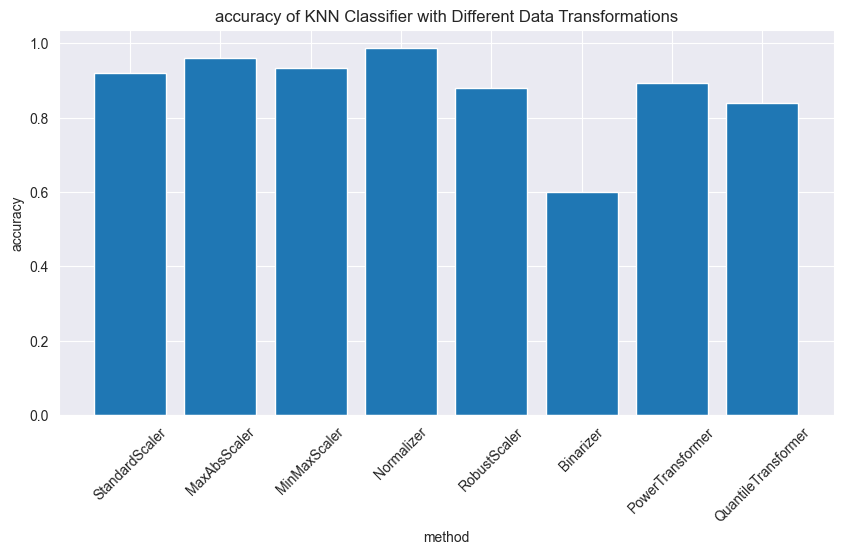

In [53]:
# Вывод графиков
plt.figure(figsize=(10, 5))
plt.bar(result_df['method'], result_df['accuracy'])
plt.xlabel('method')
plt.ylabel('accuracy')
plt.title('accuracy of KNN Classifier with Different Data Transformations')
plt.xticks(rotation=45)
plt.show()